In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(x_train,y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data() 

In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

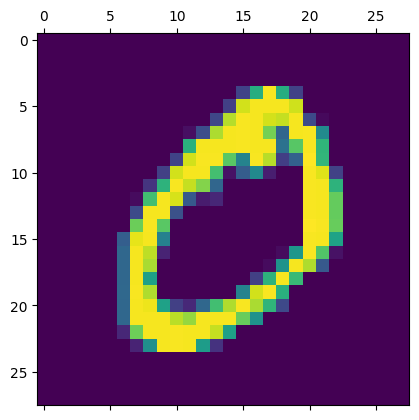

In [5]:
plt.matshow(x_train[1])

this is Scaling, and this is done to increase the accuracy of model

In [6]:
x_train = x_train/255
X_test = X_test/255

In [7]:
x_train_flattened= x_train.reshape(len(x_train),28*28)

In [8]:
x_train_flattened.shape

(60000, 784)

In [9]:
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [10]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']   
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4667 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3033 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2662 - accuracy: 0.9255


now testing the trained model


In [12]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2684 - accuracy: 0.9254


[0.268429160118103, 0.9254000186920166]

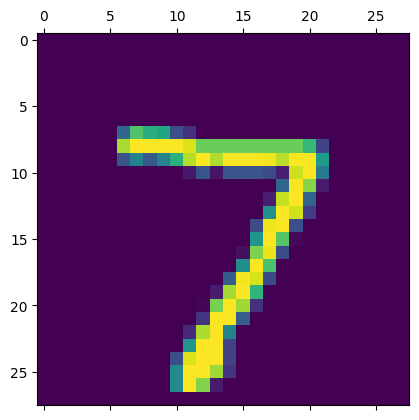

In [13]:
plt.matshow(X_test[0])

In [14]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_predicted[0]

array([2.0293843e-02, 5.0603518e-07, 5.5412982e-02, 9.5186526e-01,
       2.2637879e-03, 1.2256061e-01, 1.8104309e-06, 9.9976289e-01,
       8.6770333e-02, 5.8874142e-01], dtype=float32)

The above output shows us the weights or value of the predicted thing, look at the image
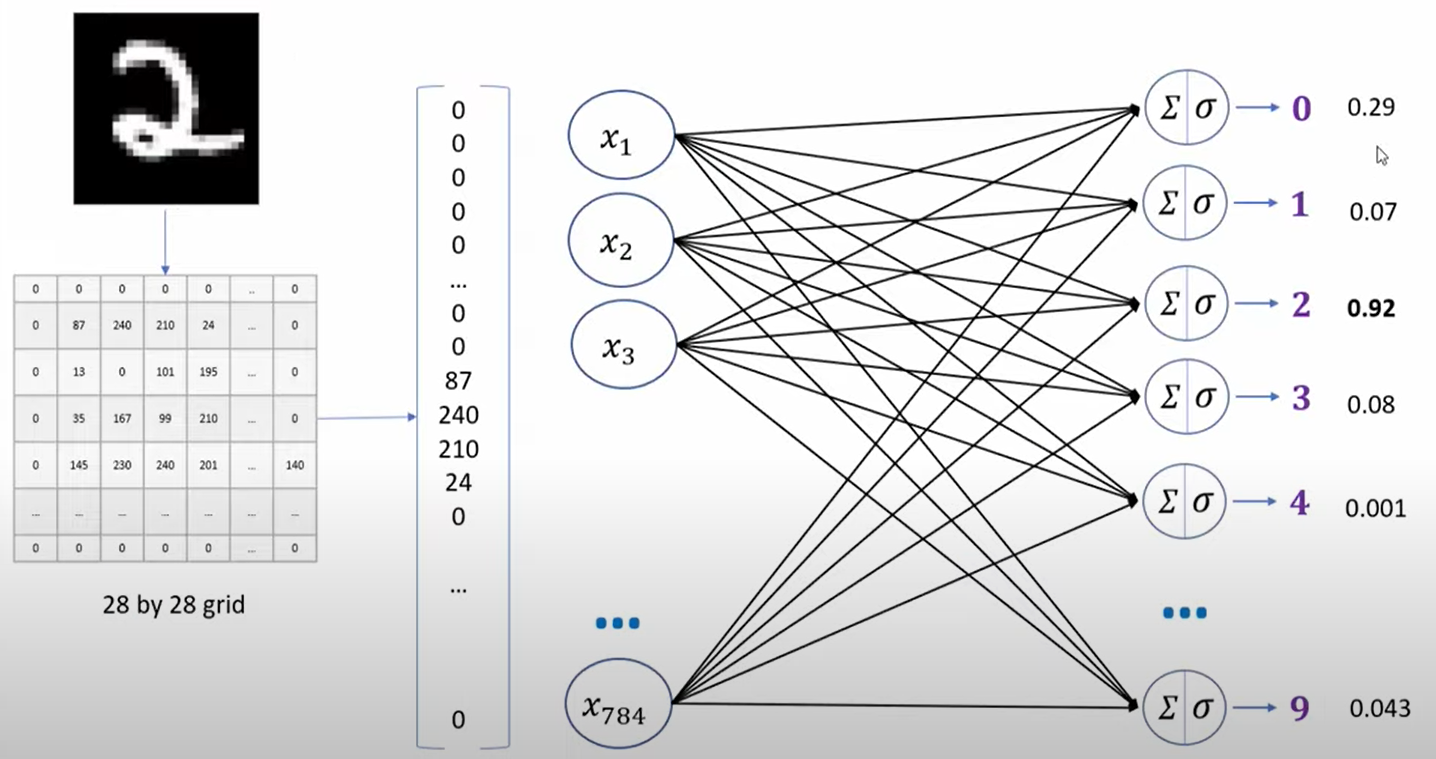

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    7,    9,    2,    2,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,   11,  918,   18,    5,    6,   14,   10,   40,    5],
       [   2,    0,   16,  912,    0,   40,    3,    9,   19,    9],
       [   1,    1,    2,    2,  899,    0,   18,    4,    9,   46],
       [   7,    3,    2,   20,    7,  798,   16,    3,   28,    8],
       [   7,    3,    3,    1,    7,   14,  920,    2,    1,    0],
       [   1,    7,   22,    7,    6,    1,    0,  949,    2,   33],
       [   4,   12,    6,   20,    8,   36,   10,   12,  860,    6],
       [  10,    7,    1,   10,   20,    8,    0,   22,    6,  925]])>

Text(220.72222222222223, 0.5, 'Truth')

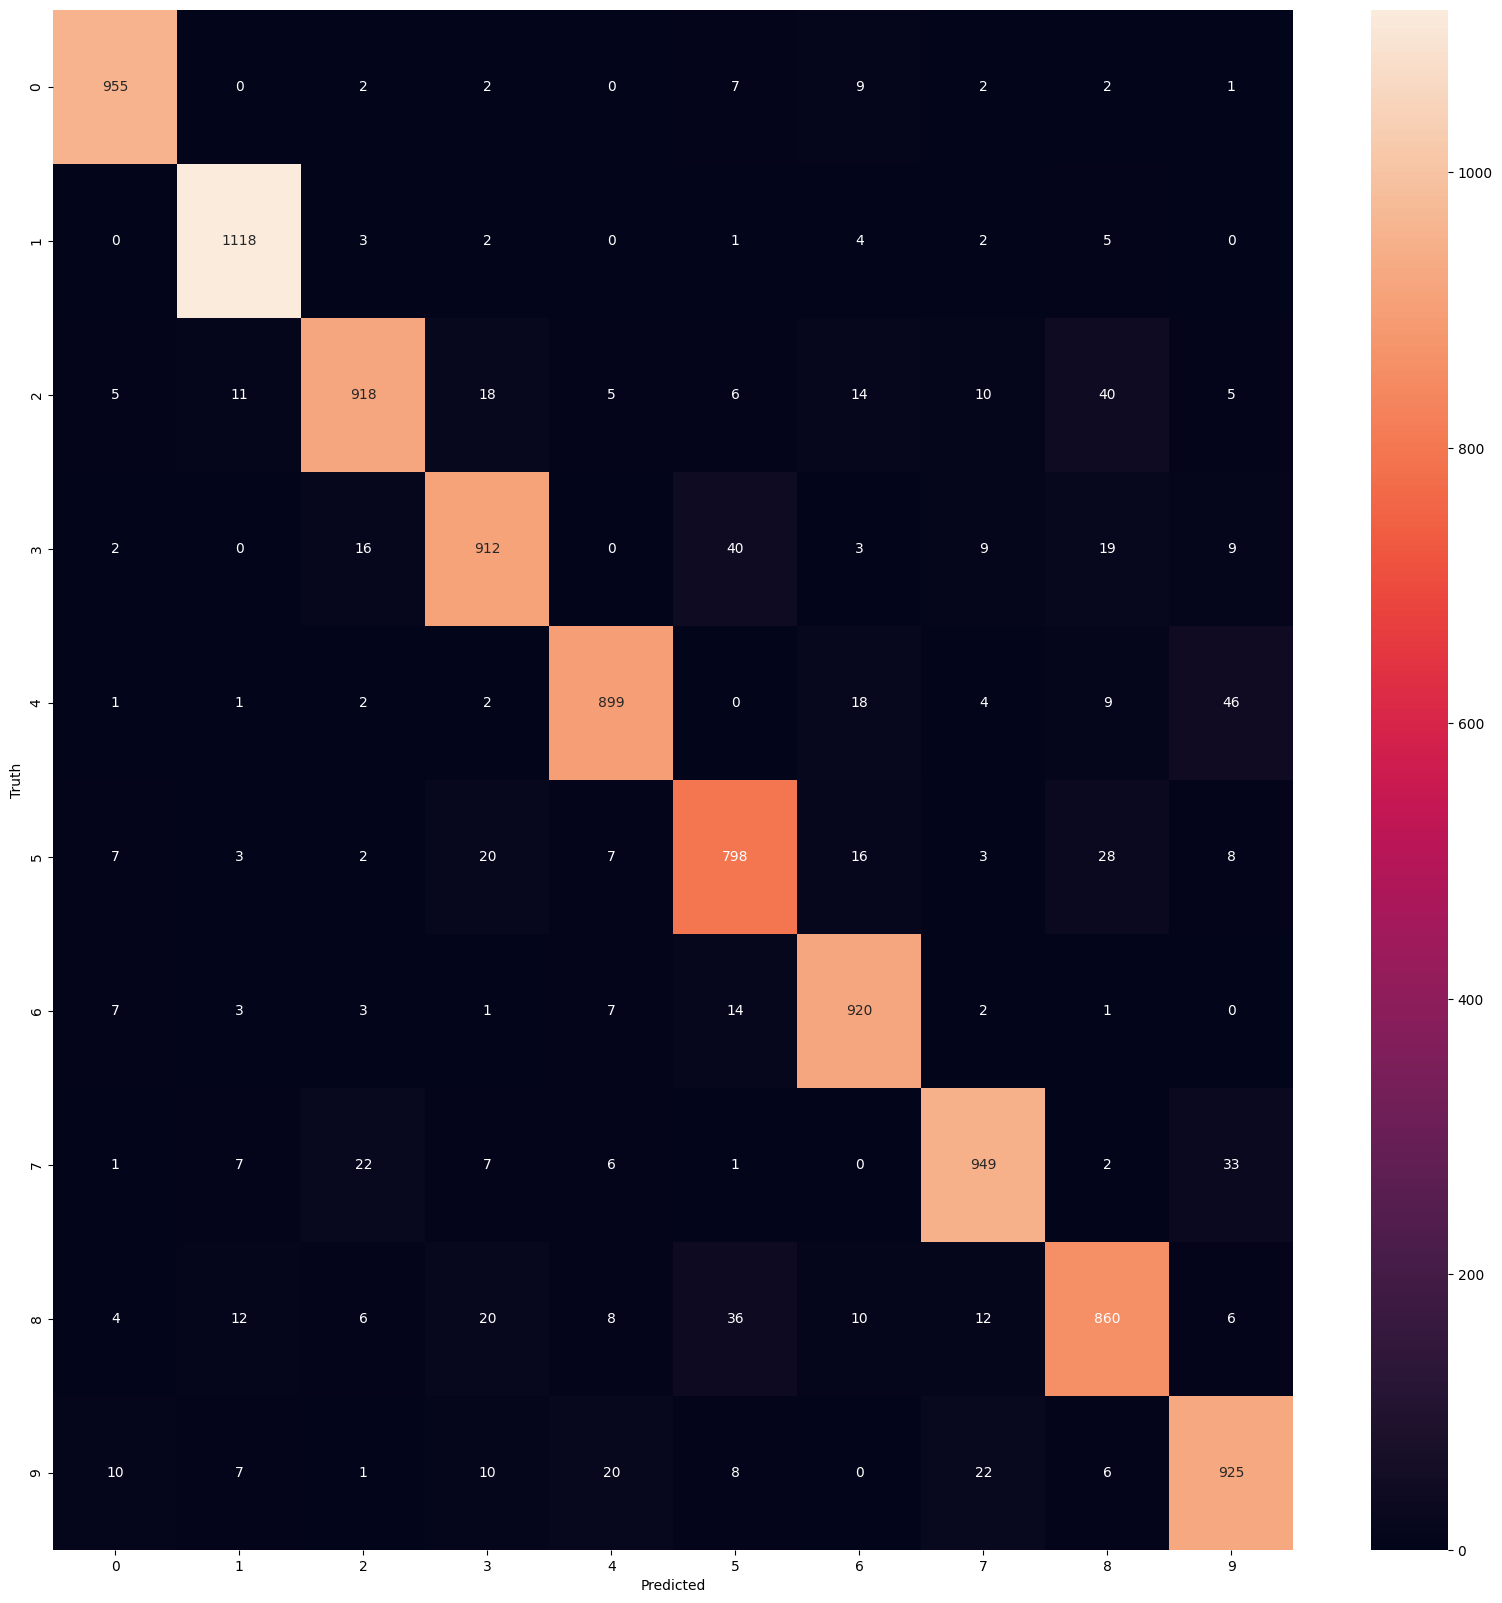

In [19]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Now we'll add a hidden layer


In [20]:
model = keras.Sequential([
keras.layers.Dense(100,input_shape=(784,),activation='relu'),
keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2763 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1264 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0881 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0669 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0527 - accuracy: 0.9836


In [21]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9749


[0.0831122100353241, 0.9749000072479248]

Text(95.72222222222221, 0.5, 'Truth')

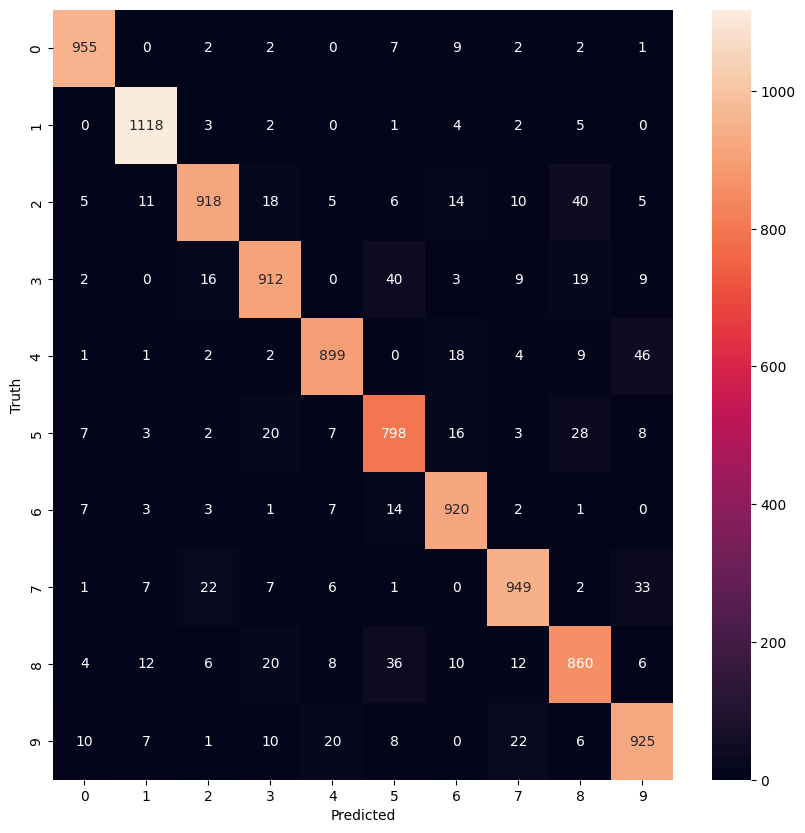

In [22]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [23]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,activation='relu'),
keras.layers.Dense(10,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2769 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1244 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0877 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0675 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0522 - accuracy: 0.9838
